In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [74]:
df = pd.read_csv("HPI_prediction_data.csv",parse_dates=["DATE"],index_col="DATE")

In [75]:
df.sample(3)

,HPI,GDP,UNEMPLOYMENT,PROPERTY_PRICE,PERSONAL INCOME,POPULATION,LISTING,PERMIT,NEW_HOMES,DELINQUENCY,Year,Men Married,Men Unmarried Divorced,Men Unmarried Widowed,Women Married,Women Unmarried Divorced,Women Unmarried Widowed,Immigrants
DATE,,,,,,,,,,,,,,,,,,
1992-07-01,76.263,6566.641,7.7,84.2302,5437.1,257063.0,NaN,1089.0,1139.0,2.88,1992,NaN,NaN,NaN,NaN,NaN,NaN,"9,73,445"
1995-11-01,81.619,NaN,5.6,NaN,6394.0,267829.0,NaN,1430.0,1452.0,NaN,1995,"57,570","7,383","2,284","58,984","10,270","11,082","7,20,177"
2016-05-01,179.419,NaN,4.8,NaN,15777.2,324260.0,NaN,1205.0,1148.0,NaN,2016,"66,695","10,708","3,469","67,450","14,831","11,387","11,83,505"


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 449 entries, 1987-01-01 to 2024-05-01
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   HPI                       449 non-null    float64
 1   GDP                       150 non-null    float64
 2   UNEMPLOYMENT              449 non-null    float64
 3   PROPERTY_PRICE            149 non-null    float64
 4   PERSONAL INCOME           449 non-null    float64
 5   POPULATION                449 non-null    float64
 6   LISTING                   95 non-null     float64
 7   PERMIT                    449 non-null    float64
 8   NEW_HOMES                 449 non-null    float64
 9   DELINQUENCY               134 non-null    float64
 10  Year                      449 non-null    int64  
 11  Men Married               384 non-null    object 
 12  Men Unmarried Divorced    384 non-null    object 
 13  Men Unmarried Widowed     384 non-null    obje

In [77]:
# Label formatting
df.columns = df.columns.str.lower().str.replace(" ","_")

In [78]:
df.columns

Index(['hpi', 'gdp', 'unemployment', 'property_price', 'personal_income',
       'population', 'listing', 'permit', 'new_homes', 'delinquency', 'year',
       'men_married', 'men_unmarried_divorced', 'men_unmarried_widowed',
       'women_married', 'women_unmarried_divorced', 'women_unmarried_widowed',
       'immigrants'],
      dtype='object')

In [79]:
# formating and changing the dtype of the columns
columns = ["men_married","men_unmarried_divorced","men_unmarried_widowed","women_married","women_unmarried_divorced","women_unmarried_widowed","immigrants"]

for col in columns:
    df[col] = df[col].str.replace(",","")
    df[col] = df[col].astype("float64")

In [80]:
df.sample()

,hpi,gdp,unemployment,property_price,personal_income,population,listing,permit,new_homes,delinquency,year,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants
DATE,,,,,,,,,,,,,,,,,,
2020-02-01,215.902,NaN,3.5,NaN,18925.6,331525.0,928343.0,1442.0,1537.0,NaN,2020,68431.0,10667.0,3479.0,69341.0,14681.0,11267.0,707362.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 449 entries, 1987-01-01 to 2024-05-01
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hpi                       449 non-null    float64
 1   gdp                       150 non-null    float64
 2   unemployment              449 non-null    float64
 3   property_price            149 non-null    float64
 4   personal_income           449 non-null    float64
 5   population                449 non-null    float64
 6   listing                   95 non-null     float64
 7   permit                    449 non-null    float64
 8   new_homes                 449 non-null    float64
 9   delinquency               134 non-null    float64
 10  year                      449 non-null    int64  
 11  men_married               384 non-null    float64
 12  men_unmarried_divorced    384 non-null    float64
 13  men_unmarried_widowed     384 non-null    floa

In [82]:
# Cheacking the null values
df.isna().mean()*100

hpi                          0.000000
gdp                         66.592428
unemployment                 0.000000
property_price              66.815145
personal_income              0.000000
population                   0.000000
listing                     78.841871
permit                       0.000000
new_homes                    0.000000
delinquency                 70.155902
year                         0.000000
men_married                 14.476615
men_unmarried_divorced      14.476615
men_unmarried_widowed       14.476615
women_married               14.476615
women_unmarried_divorced    14.476615
women_unmarried_widowed     14.476615
immigrants                   3.786192
dtype: float64

In [83]:
# Dropping the listing columns as too much data is missing
df.drop(columns = ["listing","year"], inplace=True)

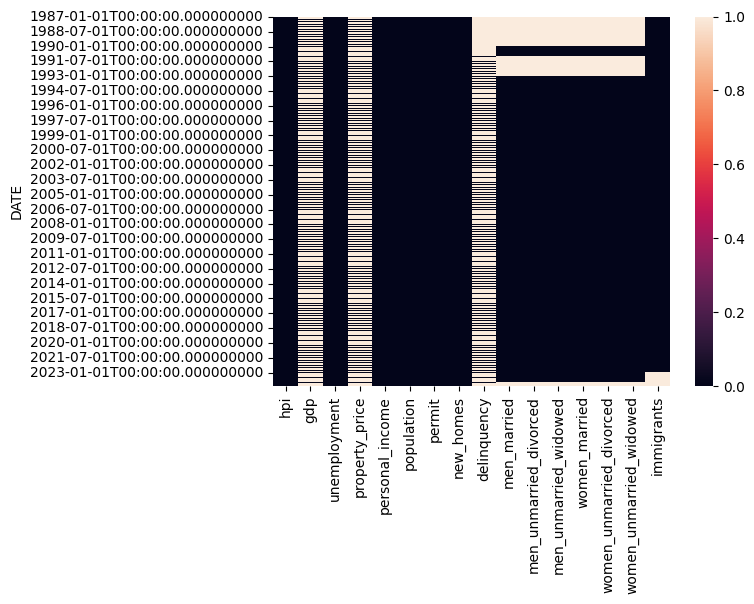

In [84]:
sns.heatmap(df.isna())
plt.show()

In [85]:
df1 = df.copy()
df2 = df.copy()

In [86]:
X = df.drop(columns="hpi")
y = df["hpi"]

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# **KNN IMPUTER**

In [88]:
knn = KNNImputer()

In [89]:
n_neigbour = [1,2,3,4,5,6,7,8,9,10]
accu = []
dt = DecisionTreeRegressor()

for index,i in enumerate(n_neigbour,start=1):
    
    knn = KNNImputer(n_neighbors=i,weights="distance")
    X_train_trf = knn.fit_transform(X_train)
    X_test_trf = knn.transform(X_test)

    X_train_trf = pd.DataFrame(X_train_trf,columns=X_train.columns)
    X_test_trf  = pd.DataFrame(X_test_trf,columns=X_test.columns)

    dt.fit(X_train_trf,y_train)
    y_pred = dt.predict(X_test_trf)
    r2 = r2_score(y_test,y_pred)
    n = X_test.shape[0]  
    k = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    print(int(i), adjusted_r2)
    accu.append(adjusted_r2)
    
    

1 0.9983702198550871
2 0.9980684827941593
3 0.9979260433010161
4 0.9985295036470316
5 0.9980617774481165
6 0.9987023766453119
7 0.9981334709409317
8 0.9983282188101649
9 0.9984152383832589
10 0.9980526299334337


<Axes: >

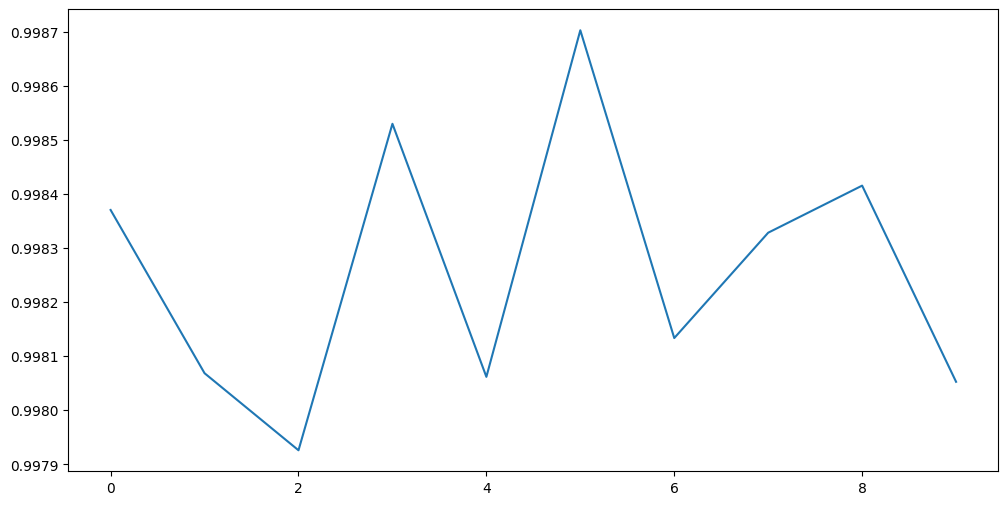

In [90]:
plt.figure(figsize=(12,6))
sns.lineplot(accu)

In [91]:
df.iloc[:, 1:].head(2)

,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants
DATE,,,,,,,,,,,,,,,
1987-01-01,4722.156,6.6,85.2524,3820.2,241857.0,1690.0,1774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0
1987-02-01,NaN,6.6,NaN,3845.0,242005.0,1689.0,1784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599889.0


In [92]:

# n_neighbors =4 shows best 
knn = KNNImputer(n_neighbors=4,weights="distance")
X_train_knn = knn.fit_transform(df.iloc[:, 1:])
df.iloc[:, 1:] = pd.DataFrame(X_train_knn,columns=df.iloc[:, 1:].columns)

In [93]:
df_knn = df.copy()

In [94]:
df_knn.head()

,hpi,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants
DATE,,,,,,,,,,,,,,,,
1987-01-01,63.965,4722.156000,6.6,85.252400,3820.2,241857.0,1690.0,1774.0,1.989516,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-02-01,64.423,4774.223002,6.6,85.768367,3845.0,242005.0,1689.0,1784.0,1.989524,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-03-01,64.735,4803.592036,6.6,86.060968,3863.8,242166.0,1704.0,1726.0,1.989524,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-04-01,65.131,4806.160000,6.3,86.089600,3875.4,242338.0,1601.0,1614.0,1.989517,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-05-01,65.563,4834.203183,6.3,86.370671,3908.6,242516.0,1500.0,1628.0,1.989525,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0


In [95]:
df_knn.isna().sum()

hpi                         0
gdp                         0
unemployment                0
property_price              0
personal_income             0
population                  0
permit                      0
new_homes                   0
delinquency                 0
men_married                 0
men_unmarried_divorced      0
men_unmarried_widowed       0
women_married               0
women_unmarried_divorced    0
women_unmarried_widowed     0
immigrants                  0
dtype: int64

# **Exploratory Data Analysis**

**Correlation**

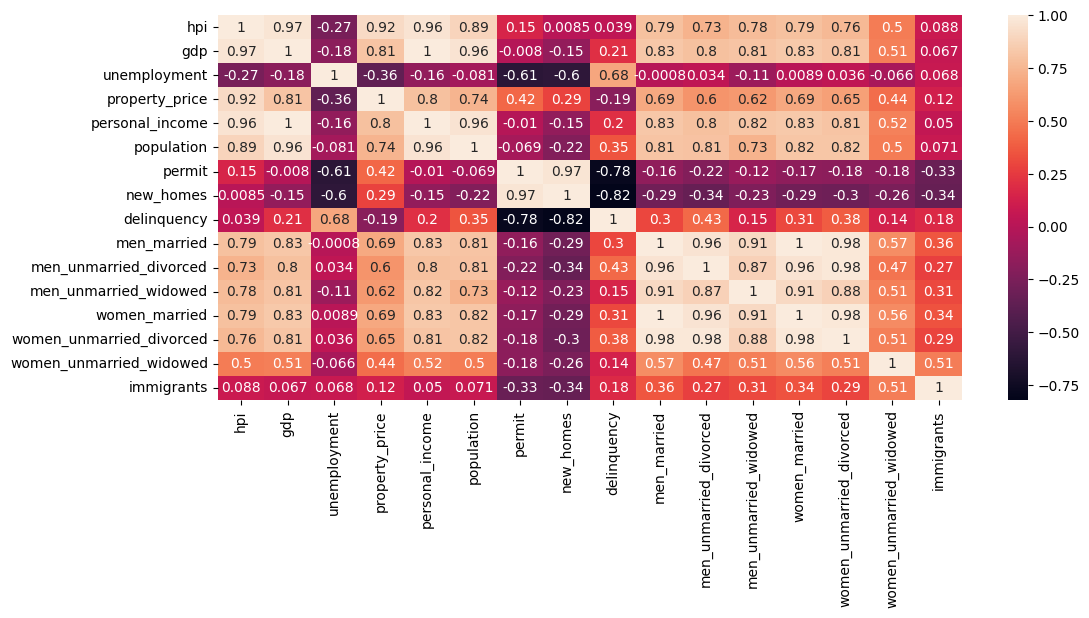

In [96]:
plt.figure(figsize = (12,5))
sns.heatmap(df_knn.corr(),annot = True)
plt.show()

In [97]:
df_knn

,hpi,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,men_unmarried_divorced,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants
DATE,,,,,,,,,,,,,,,,
1987-01-01,63.965,4722.156000,6.6,85.252400,3820.2,241857.0,1690.0,1774.0,1.989516,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-02-01,64.423,4774.223002,6.6,85.768367,3845.0,242005.0,1689.0,1784.0,1.989524,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-03-01,64.735,4803.592036,6.6,86.060968,3863.8,242166.0,1704.0,1726.0,1.989524,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-04-01,65.131,4806.160000,6.3,86.089600,3875.4,242338.0,1601.0,1614.0,1.989517,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
1987-05-01,65.563,4834.203183,6.3,86.370671,3908.6,242516.0,1500.0,1628.0,1.989525,59039.0,8556.0,2542.0,60001.0,11162.0,10944.0,599889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,315.787,28269.174000,3.7,160.616300,23560.0,336194.0,1508.0,1376.0,1.710000,68713.0,11082.0,3782.0,69044.0,14882.0,11328.0,1018349.0
2024-02-01,317.332,28271.004308,3.9,160.217694,23626.3,336306.0,1563.0,1546.0,1.715157,68713.0,11082.0,3782.0,69044.0,14882.0,11328.0,1018349.0
2024-03-01,318.308,28390.350236,3.8,160.148217,23746.6,336423.0,1485.0,1299.0,1.720439,68713.0,11082.0,3782.0,69044.0,14882.0,11328.0,1018349.0


In [98]:
# Extracting features from the Date columns for Time series Analysis
df_knn['date'] = df_knn.index
df_knn['quarter'] = df_knn['date'].dt.quarter
df_knn['month'] = df_knn['date'].dt.month
df_knn['year'] = df_knn['date'].dt.year
df_knn['weekofyear'] = df_knn['date'].dt.weekday

In [99]:
df_knn.head()

,hpi,gdp,unemployment,property_price,personal_income,population,permit,new_homes,delinquency,men_married,...,men_unmarried_widowed,women_married,women_unmarried_divorced,women_unmarried_widowed,immigrants,date,quarter,month,year,weekofyear
DATE,,,,,,,,,,,,,,,,,,,,,
1987-01-01,63.965,4722.156000,6.6,85.252400,3820.2,241857.0,1690.0,1774.0,1.989516,59039.0,...,2542.0,60001.0,11162.0,10944.0,599889.0,1987-01-01,1,1,1987,3
1987-02-01,64.423,4774.223002,6.6,85.768367,3845.0,242005.0,1689.0,1784.0,1.989524,59039.0,...,2542.0,60001.0,11162.0,10944.0,599889.0,1987-02-01,1,2,1987,6
1987-03-01,64.735,4803.592036,6.6,86.060968,3863.8,242166.0,1704.0,1726.0,1.989524,59039.0,...,2542.0,60001.0,11162.0,10944.0,599889.0,1987-03-01,1,3,1987,6
1987-04-01,65.131,4806.160000,6.3,86.089600,3875.4,242338.0,1601.0,1614.0,1.989517,59039.0,...,2542.0,60001.0,11162.0,10944.0,599889.0,1987-04-01,2,4,1987,2
1987-05-01,65.563,4834.203183,6.3,86.370671,3908.6,242516.0,1500.0,1628.0,1.989525,59039.0,...,2542.0,60001.0,11162.0,10944.0,599889.0,1987-05-01,2,5,1987,4


In [100]:
df_knn.drop(columns="date",inplace=True)

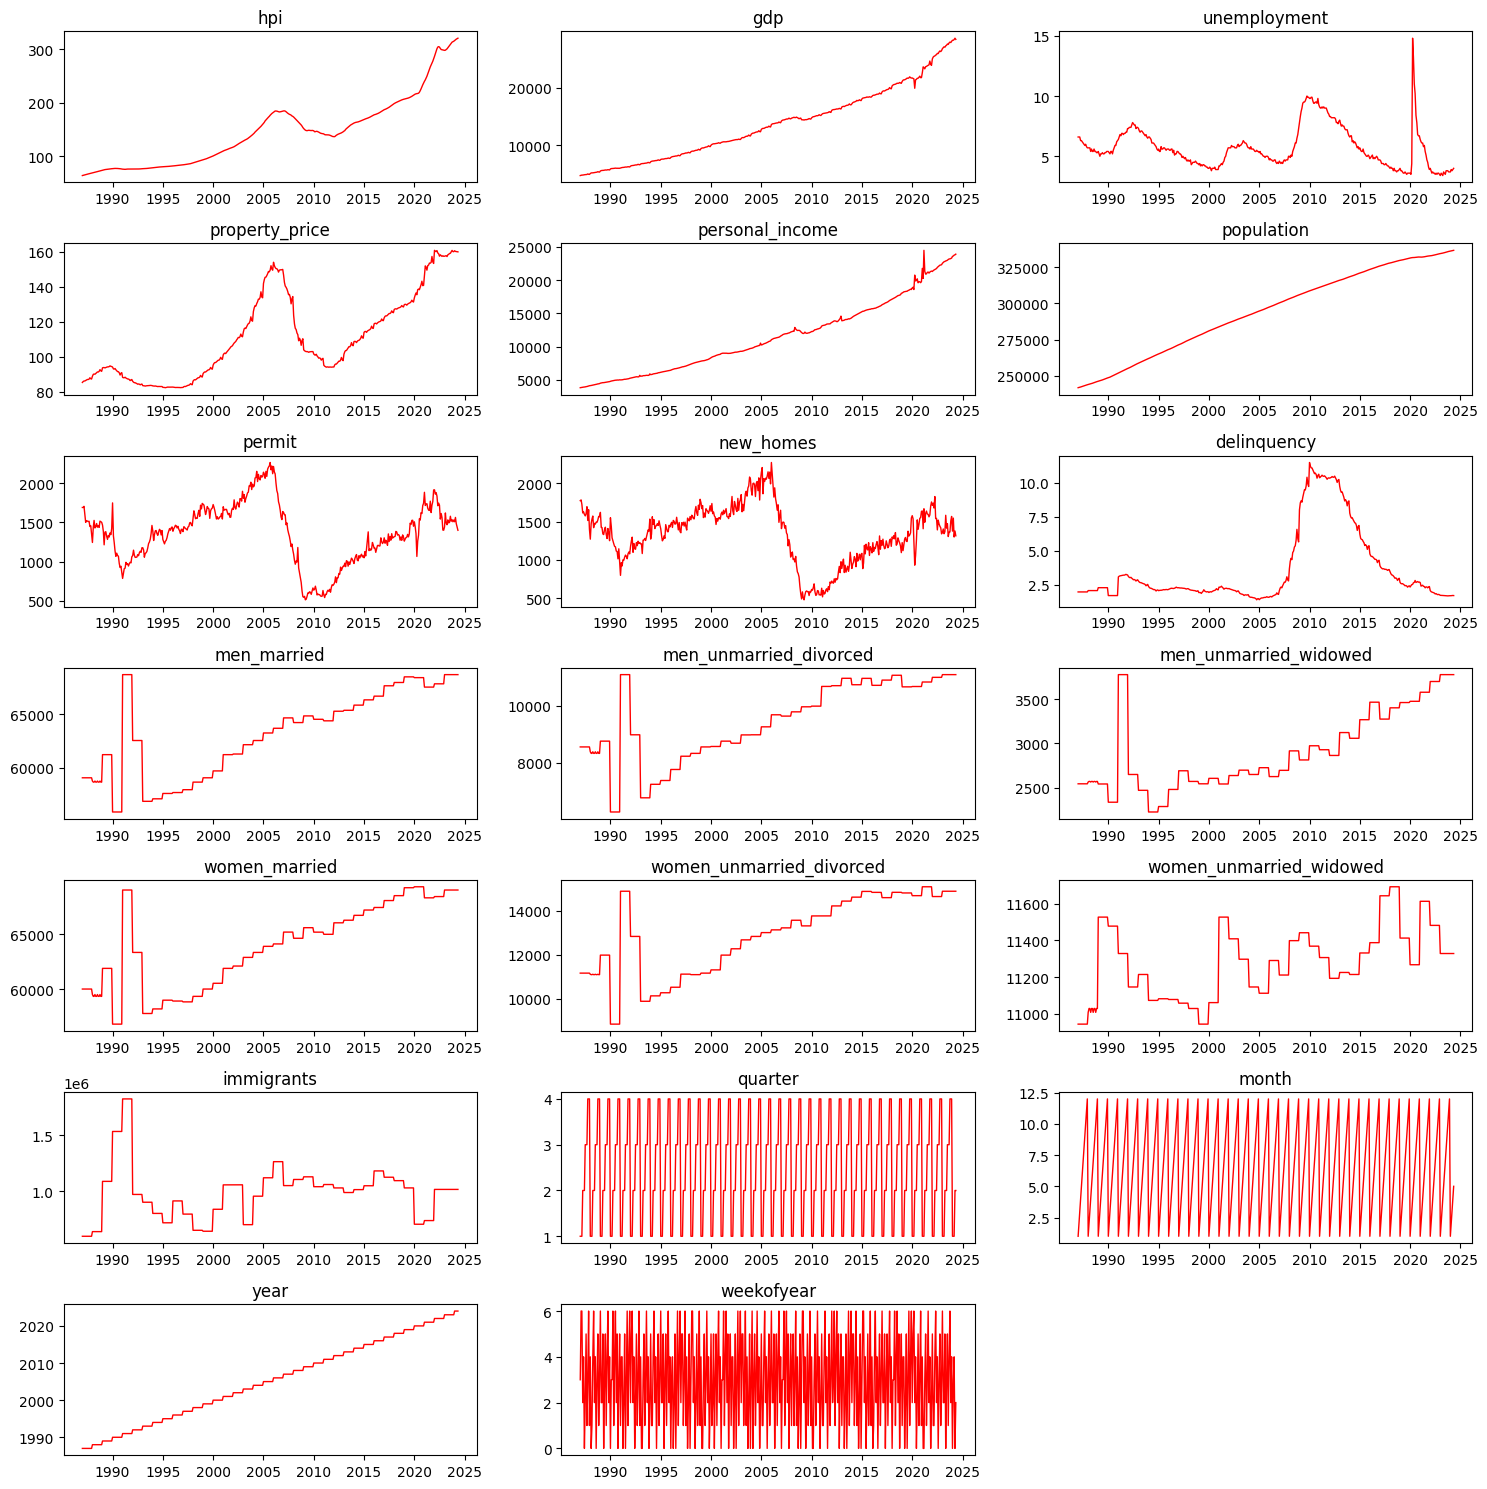

In [101]:
# Define range and columns
plot_indices = range(1, 22)  
columns = df_knn.columns

# Create subplots
plt.figure(figsize=(15, 15))  

for i, col in zip(plot_indices, columns):
    plt.subplot(7, 3, i)
    plt.plot(df_knn[col], color="red", linewidth=1)
    plt.title(col)

plt.tight_layout()  
plt.show()  


In [102]:
df_knn.to_csv("HPI_KNN_final1.csv",index=True)

# **MICE**

In [103]:
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer
from sklearn.impute import IterativeImputer

In [104]:
lst =  np.linspace(start=10,stop=200,num=10)
a = []
for i in lst:
    MICE = IterativeImputer(max_iter=20,random_state=2)
    X_train_m = MICE.fit_transform(X_train)
    X_test_m  = MICE.transform(X_test)
    X_train_m = pd.DataFrame(X_train_m,columns = X_train.columns)
    X_test_m = pd.DataFrame(X_test_m,columns = X_test.columns)

    dt.fit(X_train_m,y_train)
    y_pred = dt.predict(X_test_m)
    r2 = r2_score(y_test,y_pred)
    n = X_test.shape[0]  
    k = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    print(int(i), adjusted_r2)
    a.append(adjusted_r2)
    

10 0.9988212115951416
31 0.9987642160563918
52 0.9987526884781797
73 0.998752994058495
94 0.9987271218641288
115 0.9986699394535492
136 0.99880664733199
157 0.9986886950806426
178 0.9987624924650301
200 0.9987287541393248


<Axes: >

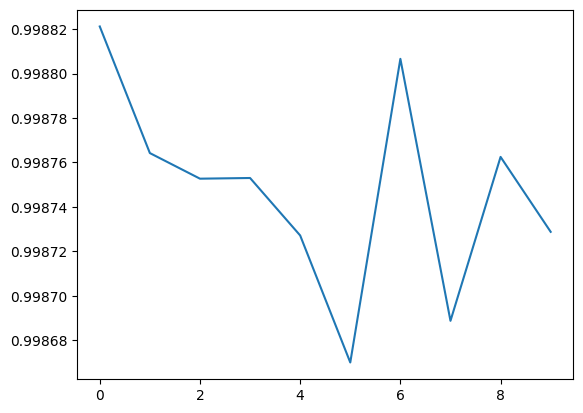

In [105]:
sns.lineplot(a)

In [106]:
MICE = IterativeImputer(max_iter=115,random_state=2)
X_train_mice = MICE.fit_transform(df1.iloc[:, 1:])
df1.iloc[:, 1:] = pd.DataFrame(X_train_mice,columns=df1.iloc[:, 1:].columns)


In [107]:
df_mice = df1.copy()

In [108]:
df_mice.isna().sum()

hpi                         0
gdp                         0
unemployment                0
property_price              0
personal_income             0
population                  0
permit                      0
new_homes                   0
delinquency                 0
men_married                 0
men_unmarried_divorced      0
men_unmarried_widowed       0
women_married               0
women_unmarried_divorced    0
women_unmarried_widowed     0
immigrants                  0
dtype: int64

# **Exploratory Data Analysis**

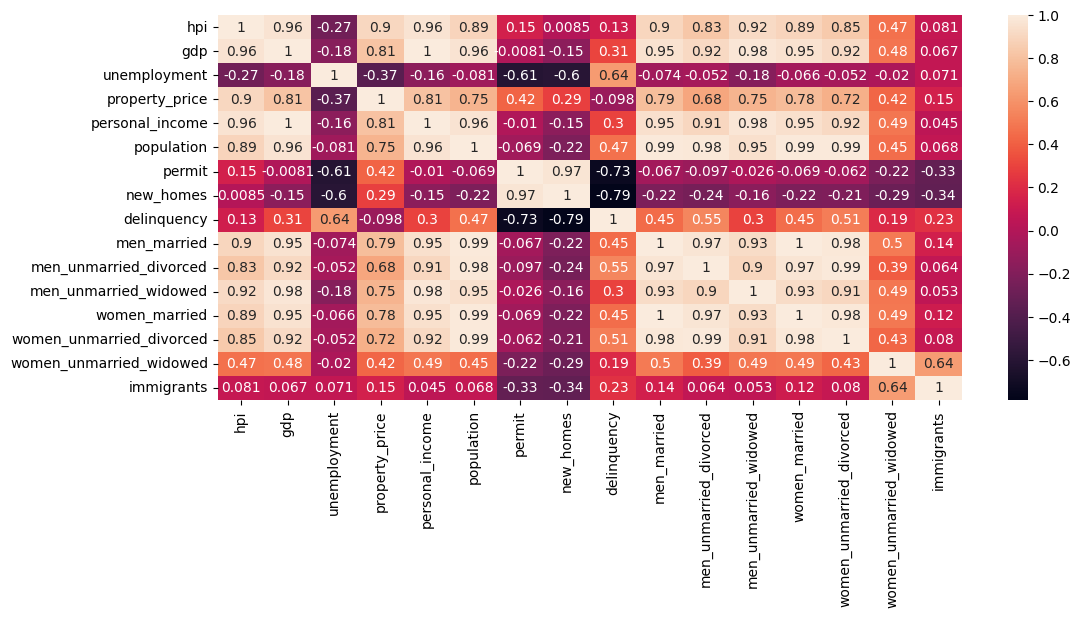

In [109]:
plt.figure(figsize = (12,5))
sns.heatmap(df_mice.corr(),annot=True)
plt.show()

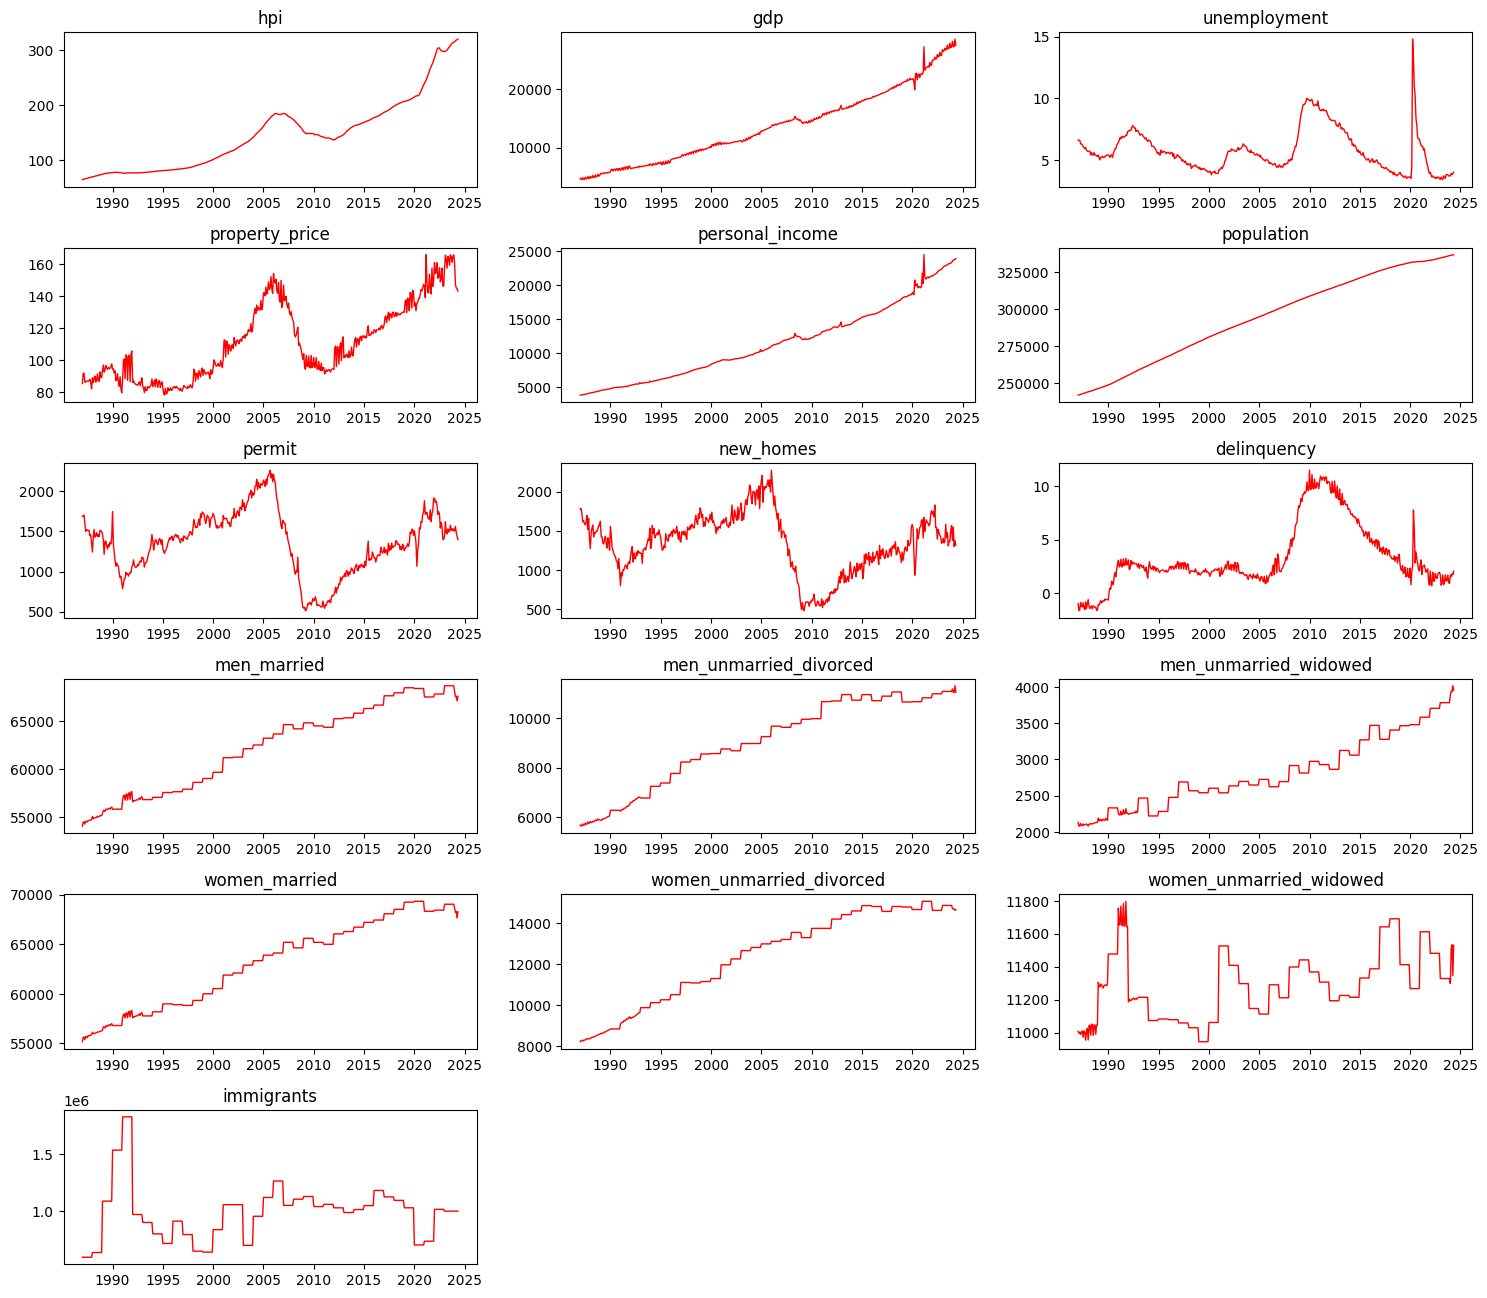

In [110]:
# Define range and columns
plot_indices = range(1, 22)  
columns = df_mice.columns

# Create subplots
plt.figure(figsize=(15, 15))  

for i, col in zip(plot_indices, columns):
    plt.subplot(7, 3, i)
    plt.plot(df_mice[col], color="red", linewidth=1)
    plt.title(col)

plt.tight_layout()  
plt.show()  



In [111]:
df_mice.to_csv("HPI_MICE_final_2.csv",index =False)